In [367]:
import pandas as pd
import matplotlib.pyplot as plt
from graph_tool import Graph, util
import csv
import netpixi
from netpixi.data.gt import *

In [368]:
data = pd.read_csv("atp_dataset.csv")
data

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Winner,Winner_Int,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds
0,1,BrisbaneInternational,1.2757,1/1/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,ThompsonJ.,6.7926,ThompsonJ.,6.7926,YmerE.,6.0375,79.0,160.0,1.29,3.50
1,1,BrisbaneInternational,1.2757,1/2/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,MahutN.,6.9297,MahutN.,6.9297,RobertS.,6.9152,39.0,54.0,1.54,2.43
2,1,BrisbaneInternational,1.2757,1/2/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,FerrerD.,6.3881,FerrerD.,6.3881,TomicB.,6.6345,21.0,26.0,2.01,1.77
3,1,BrisbaneInternational,1.2757,1/2/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,EdmundK.,6.8384,EdmundK.,6.8384,EscobedoE.,6.1645,45.0,141.0,1.37,3.01
4,1,BrisbaneInternational,1.2757,1/2/17,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,DimitrovG.,6.5157,DimitrovG.,6.5157,JohnsonS.,6.1087,17.0,33.0,1.41,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,65,MastersCup,1.7532,11/10/12,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,DelPotroJ.M.,6.0310,DelPotroJ.M.,6.0310,FedererR.,6.7289,7.0,2.0,2.82,1.42
14742,65,MastersCup,1.7532,11/10/12,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FerrerD.,6.3881,FerrerD.,6.3881,TipsarevicJ.,6.0563,5.0,9.0,1.20,4.55
14743,65,MastersCup,1.7532,11/11/12,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,DjokovicN.,6.9457,DjokovicN.,6.9457,DelPotroJ.M.,6.2204,1.0,7.0,1.22,4.28
14744,65,MastersCup,1.7532,11/11/12,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,FedererR.,6.9997,MurrayA.,6.2109,2.0,3.0,2.16,1.68


In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14746 entries, 0 to 14745
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ATP             14746 non-null  int64  
 1   Tournament      14746 non-null  object 
 2   Tournament_Int  14746 non-null  float64
 3   Date            14746 non-null  object 
 4   Series          14746 non-null  object 
 5   Series_Int      14746 non-null  float64
 6   Court           14746 non-null  object 
 7   Court_Int       14746 non-null  float64
 8   Surface         14746 non-null  object 
 9   Surface_Int     14746 non-null  float64
 10  Round           14746 non-null  object 
 11  Round_Int       14746 non-null  float64
 12  Best_of         14746 non-null  int64  
 13  Winner          14746 non-null  object 
 14  Winner_Int      14746 non-null  float64
 15  Player1         14746 non-null  object 
 16  Player1_Int     14746 non-null  float64
 17  Player2         14746 non-null 

In [370]:
with open("./atp_dataset.csv") as file:
    filtered_lines = []
    reader = csv.reader(file, delimiter=',', quotechar='"')
    i = 0
    for line in reader:
        if i > 0:
            dates = line[3]
            year = dates.split("/")[2]
            if year == "15":
                filtered_lines.append(line)
        i+=1
print(filtered_lines)

[['1', 'BrisbaneInternational', '1.2757', '1/5/15', 'ATP250', '2.9693', 'Outdoor', '3.6494', 'Hard', '4.4983', '1stRound', '5.1257', '3', 'DuckworthJ.', '6.1593', 'DuckworthJ.', '6.1593', 'SimonG.', '6.6388', '125', '21', '4.31', '1.2'], ['1', 'BrisbaneInternational', '1.2757', '1/5/15', 'ATP250', '2.9693', 'Outdoor', '3.6494', 'Hard', '4.4983', '1stRound', '5.1257', '3', 'KokkinakisT.', '6.3513', 'KokkinakisT.', '6.3513', 'BenneteauJ.', '6.898', '149', '25', '2.62', '1.47'], ['1', 'BrisbaneInternational', '1.2757', '1/5/15', 'ATP250', '2.9693', 'Outdoor', '3.6494', 'Hard', '4.4983', '1stRound', '5.1257', '3', 'ChardyJ.', '6.2796', 'ChardyJ.', '6.2796', 'GolubevA.', '6.7583', '31', '72', '1.32', '3.3'], ['1', 'BrisbaneInternational', '1.2757', '1/5/15', 'ATP250', '2.9693', 'Outdoor', '3.6494', 'Hard', '4.4983', '1stRound', '5.1257', '3', 'TomicB.', '6.5792', 'TomicB.', '6.5792', 'QuerreyS.', '6.8631', '53', '35', '1.61', '2.25'], ['1', 'BrisbaneInternational', '1.2757', '1/6/15', 'ATP2

In [371]:
#filtering player lists
players1 = []
players2 = []
for i in filtered_lines:
    players1.append(i[15])
    players2.append(i[17])

In [372]:
#getting list of players together but checking if there's a player repeated on the lists
players = []
for i in players1:
    if i not in players:
        players.append(i)

for j in players2:
    if j not in players:
        players.append(j)

**winners -> index(13)**

**losers -> don't exist**

**player -> players_list**

In [373]:
winners = []
losers = []
for line in filtered_lines:
    for player in players:
        if (player == line[13]) and  (player not in winners):
            winners.append(player)
            break

In [374]:
historicoDePartidas = {}
listaHistoricoDePartidas=[]

for lines in filtered_lines:
    lista=[]
    lista.append(lines[13])

    if lines[13] == lines[17]:
        lista.append(lines[15])
    else:
        lista.append(lines[17])

    chave = lines[15]+"_"+lines[17]

    if chave in historicoDePartidas:
        historicoDePartidas[chave] += 1 

    else:
        historicoDePartidas[chave] = 1
        listaHistoricoDePartidas.append(lista)
print(historicoDePartidas)

{'DuckworthJ._SimonG.': 1, 'KokkinakisT._BenneteauJ.': 1, 'ChardyJ._GolubevA.': 1, 'TomicB._QuerreyS.': 1, 'KukushkinM._CopilM.': 1, 'KubotL._AndersonK.': 1, 'JohnsonS._MatosevicM.': 1, 'NieminenJ._KudlaD.': 1, 'KlizanM._MelzerJ.': 1, 'MillmanJ._WilliamsR.': 1, 'DolgopolovO._BerlocqC.': 1, 'GrothS._HewittL.': 1, 'KlizanM._DolgopolovO.': 1, 'NishikoriK._JohnsonS.': 2, 'DimitrovG._ChardyJ.': 1, 'TomicB._KokkinakisT.': 2, 'RaonicM._KukushkinM.': 1, 'GrothS._KubotL.': 1, 'DuckworthJ._NieminenJ.': 1, 'FedererR._MillmanJ.': 1, 'RaonicM._GrothS.': 1, 'DimitrovG._KlizanM.': 1, 'NishikoriK._TomicB.': 1, 'FedererR._DuckworthJ.': 1, 'RaonicM._NishikoriK.': 1, 'FedererR._DimitrovG.': 1, 'FedererR._RaonicM.': 2, 'MullerG._RogerVasselinE.': 1, 'HaiderMaurerA._GranollersM.': 1, 'CoricB._HaaseR.': 1, 'YmerE._SijslingI.': 1, 'BerankisR._VanniL.': 1, 'VeselyJ._PrashanthV.': 1, 'BedeneA._LackoL.': 1, 'ItoT._RamanathanR.': 1, 'GarciaLopezG._DonskoyE.': 1, 'CarrenoBustaP._GonzalezA.': 1, 'LuY.H._DevvarmanS

In [375]:
#creating vertex
g = Graph(directed=True)

In [376]:
for anything in players:
    g.add_vertex()

In [377]:
g.vp["name"] = g.new_vp("object")
for indice in range(len(players)):
    v = g.vertex(indice)
    g.vp['name'][v] = players[indice]


In [378]:
g.ep['Victories'] = g.new_ep('object')

In [379]:
indice = 0
for matches in listaHistoricoDePartidas:
    vencedor = matches[0]
    perdedor = matches[1]
    str_index_vencedor = util.find_vertex(g,g.vp['name'],vencedor) 
    index_vencedor = int(str(str_index_vencedor).split(" ")[4].replace("'",""))

    str_index_perdedor = util.find_vertex(g,g.vp['name'],perdedor) 
    index_perdedor = int(str(str_index_perdedor).split(" ")[4].replace("'",""))

    g.add_edge(index_vencedor, index_perdedor)

    e = g.edge(index_vencedor, index_perdedor)
    g.ep['Victories'][e] = historicoDePartidas[vencedor+'_'+perdedor]
    indice+=1

In [380]:
n_v = g.num_vertices()
n_a = g.num_edges()

if g.is_directed():
    max_edges = n_v * (n_v - 1)
else:
    max_edges = n_v * (n_v - 1) // 2

d = n_a / max_edges

print("Vertices: {}, Arestas: {}, Densidade: {} ".format(n_v, n_a, d))

Vertices: 284, Arestas: 2312, Densidade: 0.02876623699795949 


In [381]:
df = pd.DataFrame({k: list(v) for k, v in g.vp.items()})
df

,name
0,DuckworthJ.
1,KokkinakisT.
2,ChardyJ.
3,TomicB.
4,KukushkinM.
...,...
279,PrzysieznyM.
280,WuD.
281,NikiT.
282,YmerM.


In [382]:
in_degrees = []
for v in g.vertices():
    in_degrees.append(v.in_degree())

out_degrees = []
for v in g.vertices():
    out_degrees.append(v.out_degree())

degrees = []
for indeg, outdeg in zip(in_degrees, out_degrees):
    degrees.append(indeg + outdeg)

In [383]:
df['degree'] = degrees
df["in_degrees"] = in_degrees
df["out_degrees"] = out_degrees
df

,name,degree,in_degrees,out_degrees
0,DuckworthJ.,19,10,9
1,KokkinakisT.,25,14,11
2,ChardyJ.,49,23,26
3,TomicB.,52,21,31
4,KukushkinM.,38,22,16
...,...,...,...,...
279,PrzysieznyM.,2,2,0
280,WuD.,3,3,0
281,NikiT.,1,1,0
282,YmerM.,1,1,0


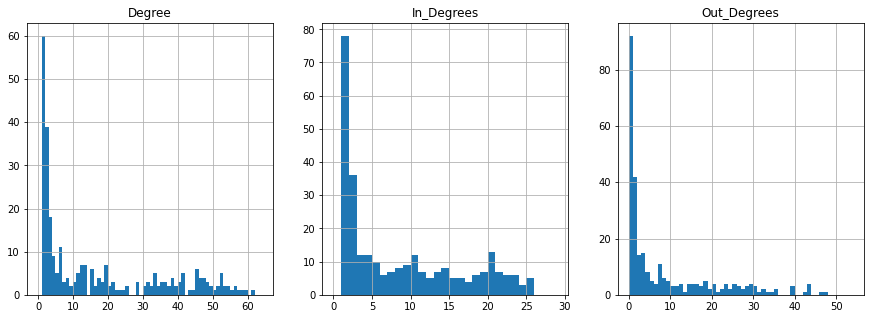

In [399]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title("Degree")
df['degree'].hist(bins=range(65))
df['degree'].describe()

plt.subplot(1, 3, 2)
plt.title("In_Degrees")
df['in_degrees'].hist(bins=range(30))
df['in_degrees'].describe()

plt.subplot(1, 3, 3)
plt.title("Out_Degrees")
df['out_degrees'].hist(bins=range(55))
df['out_degrees'].describe()

plt.show()

In [385]:
save_gt(g, 'graph.net.gz')

In [386]:
g = load_gt('graph.net.gz')

In [387]:
r = netpixi.render('./graph.net.gz');

In [388]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=0, curve2=0)

# mudar uma aresta específica a partir dos ids de sua origem e destino
r.edge(0, 1, color=0x0000ff, width=2)

In [389]:
r.vertex_set_key('name')

In [390]:
netpixi.peek('graph.net.gz')

GRAPH
    directed: bool
VERTEX
    name: str
EDGE
    Victories: int


In [391]:

g = load_gt('graph.net.gz')
m = draw_gt.sfdp_layout(g)
move_gt(g, m)
save_gt(g, 'graph.net.gz')
a=netpixi.render('graph.net.gz')
a.vertex_set_key('name')

In [392]:
# mudar a cor de fundo do grafo
a.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
a.vertex_default(color=0x000000, size=10)

# mudar a cor, a espessura e a curvatura das arestas
a.edge_default(color=0x000000, width=1, curve1=0, curve2=0)

# mudar uma aresta específica a partir dos ids de sua origem e destino
a.edge(0, 1, color=0x0000ff, width=2)